In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/Solveritas/AVR-DZ1/main/dataset_N1.csv",";")

C:\Users\Crivc\AppData\Local\Temp\ipykernel_26092\475751479.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("https://raw.githubusercontent.com/Solveritas/AVR-DZ1/main/dataset_N1.csv",";")


In [4]:
data.head()

,DateTime,Смертей за день,Заражений за день,Выздоровлений за день
0,2020-01-22 00:00:00,17,557,30.0
1,2020-01-23 00:00:00,1,100,2.0
2,2020-01-24 00:00:00,8,287,7.0
3,2020-01-25 00:00:00,16,493,3.0
4,2020-01-26 00:00:00,14,683,14.0


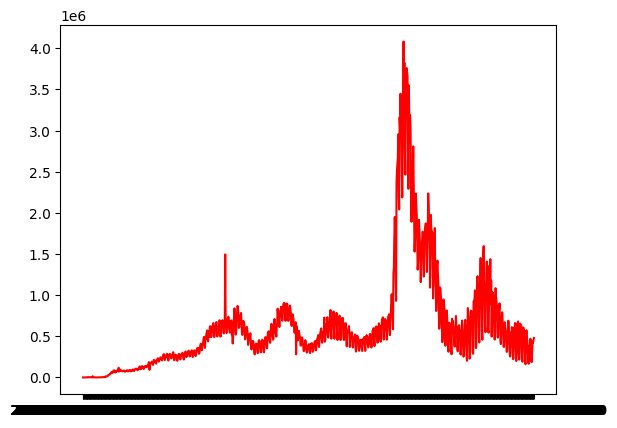

In [5]:
data_cut = data[:]

plt.plot(data_cut['DateTime'], data_cut['Заражений за день'], 'r')

In [6]:
spectra = np.fft.fft(data_cut['Заражений за день'])

a = (spectra.real**2 + spectra.imag**2)**(1/2)

theta = np.angle(spectra)

Text(0.5, 1.0, 'Прирост по дням')

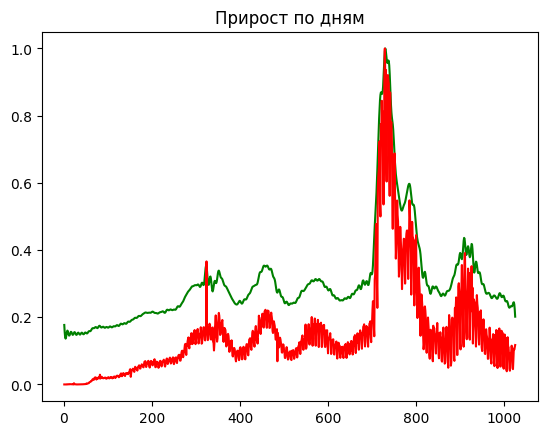

In [7]:
new_x = range(1,len(data_cut['DateTime'])+1)
new_y = np.zeros(data_cut['Заражений за день'].shape)

fd = 1 / np.mean(np.diff(new_x))

for i in range(int(len(new_y) / 8)):
    new_y += np.cos(2 * np.pi * fd/len(new_y) * i * new_x  + theta[i]) * a[i]

plt.plot(new_x,new_y/max(new_y), 'g')    
plt.plot(new_x, data_cut['Заражений за день']/max( data_cut['Заражений за день']), 'r')

plt.title("Прирост по дням")

### **получили через Фурье**

In [8]:
data_cut['Заражений за день']

0          557
1          100
2          287
3          493
4          683
         ...  
1020    324713
1021    435570
1022    422818
1023    453968
1024    479528
Name: Заражений за день, Length: 1025, dtype: int64

C:\Users\Crivc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Прирост по дням')

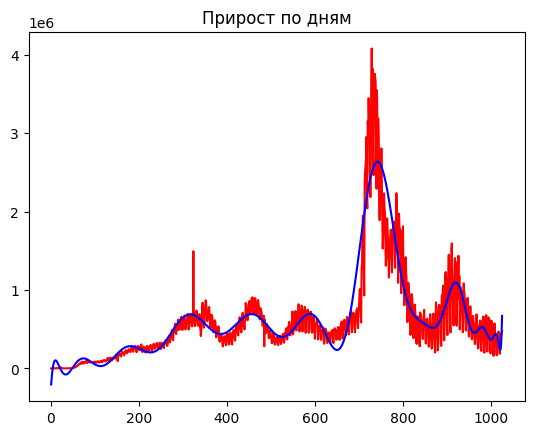

In [14]:
plt.plot(new_x, data_cut['Заражений за день'], 'r')

for deg in [65]:
    z = np.polyfit(new_x, data_cut['Заражений за день'], deg)
    p = np.poly1d(z)
    new_y = p(new_x)
    plt.plot(new_x, new_y, 'b', label=deg)
    
plt.title("Прирост по дням")

### **через полином**

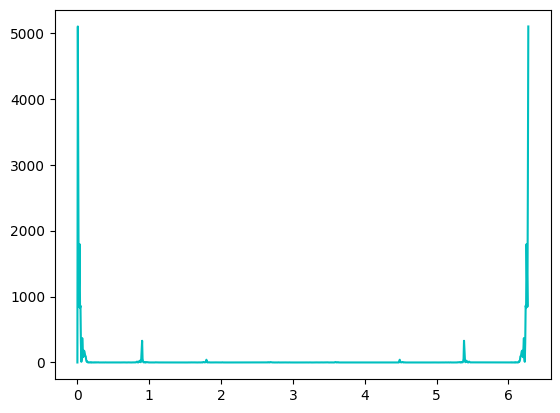

In [15]:
dat = data_cut['Заражений за день'] - np.mean(data_cut['Заражений за день'])
dat = dat / np.max(dat)

spectra = np.fft.fft(dat)

dens = np.abs(spectra)**2

f = np.asarray([2*np.pi * fd/len(dat) * i for i in range(int(len(dat)))])

plt.plot(f, dens, 'c')

(0.8, 1.0)

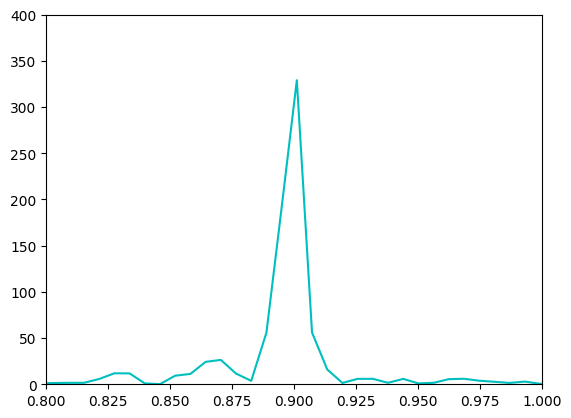

In [16]:
plt.plot(f,dens, 'c')
plt.ylim(0,400)
plt.xlim(0.8,1)

### **выделили пик**

In [17]:
deriv = np.polyder(p)

deriv2 = np.polyder(deriv)

In [18]:
deriv

poly1d([-7.49716201e-137,  2.55662133e-133, -1.30586533e-130,
       -2.24024453e-127, -3.44483027e-125,  1.72048949e-121,
        2.17416727e-118,  9.30647374e-116, -9.43575192e-113,
       -2.17904720e-109, -2.06157394e-106, -7.21035495e-104,
        1.04689007e-100,  2.25862666e-097,  2.25829032e-094,
        1.03848979e-091, -7.67301951e-089, -2.20533794e-085,
       -2.48929818e-082, -1.42198223e-079,  4.62442104e-077,
        2.13615109e-073,  2.61568695e-070,  1.54575294e-067,
       -5.06816089e-065, -2.28503731e-061, -2.57510231e-058,
       -1.06344261e-055,  1.26571346e-052,  2.64770113e-049,
        1.84870970e-046, -6.05884088e-044, -2.50710696e-040,
       -1.82982458e-037,  9.07495890e-035,  2.52335530e-031,
        7.00695221e-029, -2.15764175e-025, -1.30576731e-022,
        2.02750127e-019,  7.86340924e-017, -2.39669569e-013,
        1.78407765e-010, -7.34859840e-008,  1.90711225e-005,
       -3.21908301e-003,  3.49934691e-001, -2.34671780e+001,
        8.90771533e+002

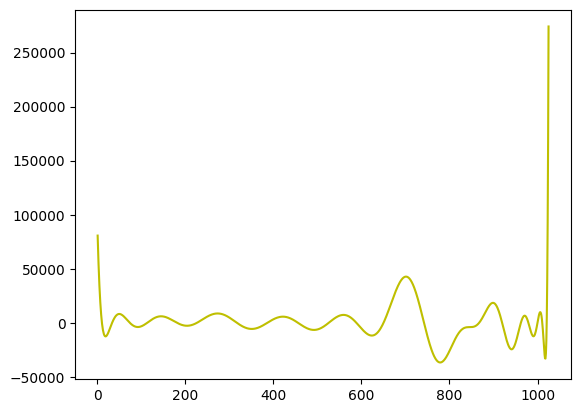

In [19]:
new_y = deriv(new_x)

plt.plot(new_x, new_y, label=deg, color='y')

In [20]:
roots=np.roots(deriv)
roots

array([ 1698.90935653   +0.j        , -1006.37475102   +0.j        ,
        -995.09953311 +150.64399734j,  -995.09953311 -150.64399734j,
        -961.43421594 +298.17746717j,  -961.43421594 -298.17746717j,
        -905.91043025 +439.52381482j,  -905.91043025 -439.52381482j,
        -829.38591586 +571.67184141j,  -829.38591586 -571.67184141j,
        -733.05097215 +691.6832304j ,  -733.05097215 -691.6832304j ,
        -618.38262289 +796.72768066j,  -618.38262289 -796.72768066j,
        -487.13276927 +884.06287517j,  -487.13276927 -884.06287517j,
        -341.25849602 +951.01922291j,  -341.25849602 -951.01922291j,
        -182.85282887 +994.93334427j,  -182.85282887 -994.93334427j,
         -14.01771646+1012.94269478j,   -14.01771646-1012.94269478j,
         163.43777163+1001.54383346j,   163.43777163-1001.54383346j,
         348.8003771  +955.2902613j ,   348.8003771  -955.2902613j ,
         545.93740177 +861.49498024j,   545.93740177 -861.49498024j,
        1020.7781927    +0.j      

In [21]:
real_valued = roots.real[abs(roots.imag)==0]

extremums = real_valued[real_valued>0]

indexes = np.array([index for index,value in enumerate(roots) if (value.imag == 0)*(value.real>0)])

In [22]:
deriv2

poly1d([-3.74858100e-135,  1.25274445e-131, -6.26815357e-129,
       -1.05291493e-125, -1.58462193e-123,  7.74220271e-120,
        9.56633597e-117,  4.00178371e-114, -3.96301581e-111,
       -8.93409353e-108, -8.24629576e-105, -2.81203843e-102,
        3.97818225e-099,  8.35691866e-096,  8.12984516e-093,
        3.63471425e-090, -2.60882663e-087, -7.27761520e-084,
       -7.96575419e-081, -4.40814491e-078,  1.38732631e-075,
        6.19483815e-072,  7.32392345e-069,  4.17353294e-066,
       -1.31772183e-063, -5.71259328e-060, -6.18024553e-057,
       -2.44591800e-054,  2.78456961e-051,  5.56017238e-048,
        3.69741941e-045, -1.15117977e-042, -4.51279253e-039,
       -3.11070178e-036,  1.45199342e-033,  3.78503295e-030,
        9.80973309e-028, -2.80493427e-024, -1.56692078e-021,
        2.23025140e-018,  7.86340924e-016, -2.15702612e-012,
        1.42726212e-009, -5.14401888e-007,  1.14426735e-004,
       -1.60954150e-002,  1.39973876e+000, -7.04015339e+001,
        1.78154307e+003

In [23]:
indexes2 = np.array([index for index,value in enumerate(deriv2) if value>0])

In [24]:
answer=np.array(extremums[np.array([index for index,value in enumerate(np.in1d(indexes,indexes2)) if value==True])],dtype=int)

In [25]:
answer

array([1020, 1010,  999,  867,  588,  525,  386,  226,  113,   33])

In [26]:
data_cut['DateTime'][answer]

1020    2022-11-07 00:00:00
1010    2022-10-28 00:00:00
999     2022-10-17 00:00:00
867     2022-06-07 00:00:00
588     2021-09-01 00:00:00
525     2021-06-30 00:00:00
386     2021-02-11 00:00:00
226     2020-09-04 00:00:00
113     2020-05-14 00:00:00
33      2020-02-24 00:00:00
Name: DateTime, dtype: object

### **Если сравнивать с изначальным графиком с сайта и его пиками, то всё хорошо подходит**